<a href="https://colab.research.google.com/github/AlexandraRoger/TP-Machine-Learning/blob/main/TP_Machine_Learning_Alexandra_Roger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Partie 1 : Analyse Exploratoire des Données (EDA)**


1.1 Vue d'ensemble des données :

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/MyDrive

Mounted at /content/drive
'Colab Notebooks'   dataset.csv   SaYoPillow.csv  'TP Machine Learning.ipynb'


In [3]:
df = pd.read_csv("drive/MyDrive/dataset.csv")

In [4]:
df.head(3)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55702 entries, 0 to 55701
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55702 non-null  int64  
 1   gender               55702 non-null  object 
 2   age                  55696 non-null  float64
 3   height(cm)           55702 non-null  int64  
 4   weight(kg)           55696 non-null  float64
 5   waist(cm)            55702 non-null  float64
 6   eyesight(left)       55702 non-null  float64
 7   eyesight(right)      55702 non-null  float64
 8   hearing(left)        55702 non-null  float64
 9   hearing(right)       55702 non-null  float64
 10  systolic             55702 non-null  float64
 11  relaxation           55702 non-null  float64
 12  fasting blood sugar  55702 non-null  float64
 13  Cholesterol          55702 non-null  float64
 14  triglyceride         55702 non-null  float64
 15  HDL                  55702 non-null 

Les différentes colonnes du jeu de donnée: ID, gender, age, height, weight, waist, eyesight left and right, hearing lef and right...

In [6]:
rows = len(df.axes[0])
print(rows)

55702


Il y a 55702 entrées dans le jeu de données

In [7]:
print(df.isnull().sum())
print("Il y a", df.isnull().sum().sum(), "valeures nulles" )

ID                     0
gender                 0
age                    6
height(cm)             0
weight(kg)             6
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64
Il y a 12 valeures nulles


1.2 Statistiques descriptives :

In [8]:
print("Moyenne age:",df["age"].mean(),"ans")
print("Moyenne taille:",df["height(cm)"].mean(),"cm")
print("Moyenne poids:",df["weight(kg)"].mean(),"kg")

Moyenne age: 44.97656923297903 ans
Moyenne taille: 164.6486661161179 cm
Moyenne poids: 65.86424518816432 kg


<Axes: ylabel='age'>

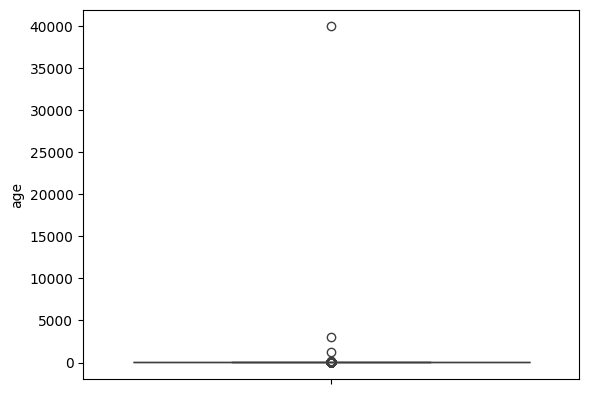

In [9]:
sns.boxplot(df['age'])

In [10]:
print(df["hemoglobin"].std())

1.5644757507736968


1.3 Distribution de la donnée :

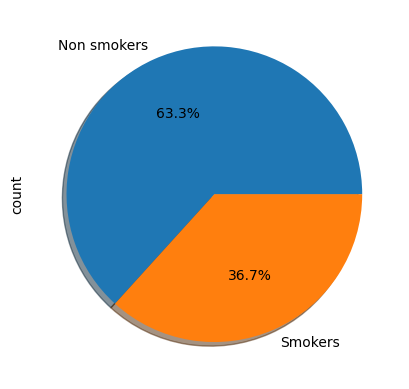

In [11]:
counts = df['smoking'].value_counts(dropna=False)
counts.plot.pie(autopct='%1.1f%%', labels=['Non smokers', 'Smokers'], shadow=True)
plt.show()

In [12]:
SM = len(df[(df.smoking == 1) & (df.gender == 'M')])
SW = len(df[(df.smoking == 1) & (df.gender == 'F')])

print("nbr d'hommes fumeurs :", SM)
print("nbr de femmes fumeuses :", SW)

nbr d'hommes fumeurs : 19598
nbr de femmes fumeuses : 859


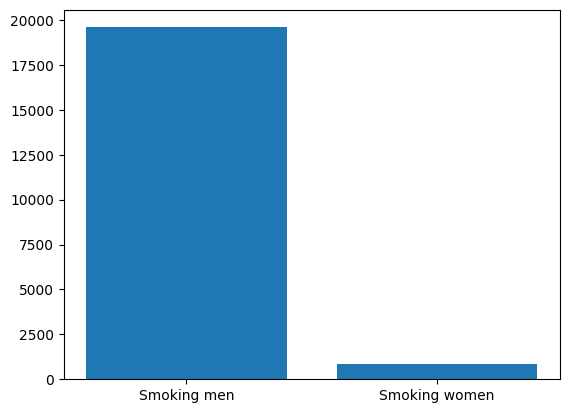

In [13]:
cat = ['Smoking men', 'Smoking women']
values = [19598, 859]

plt.bar(cat, values)
plt.show()

In [14]:
SM = df[(df.smoking == 1) & (df.gender == 'M')]
mean_age = SM['age'].mean()

print("La moyenne de l'âge est :", mean_age, "ans")

La moyenne de l'âge est : 43.437005664132265 ans


1.4 Analyse de corrélation :

In [15]:
corr = df.corr()
print(corr)

ValueError: could not convert string to float: 'F'

nous ne pouvons pas visualiser la matrice de correlation car il y a des strings dans les données

**Partie 2 : Data pre-processing**

2.1 Gestion des Valeurs Manquantes :

pour gerer les valeurs manquantes je decide de supprimer les lignes où au moins une valeure est manquante, cela ne devrait pas beaucoup impacter les resultats car il y en a très peu

In [18]:
df2=df.dropna()
df2

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55691,55691,M,55.0,160,65.0,85.0,0.9,0.7,1.0,1.0,...,15.0,1.0,0.8,26.0,29.0,41.0,Y,0,Y,1
55692,55681,F,180.0,160,50.0,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55693,55683,F,1200.0,160,50.0,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55694,55684,M,3000.0,165,60.0,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


2.2 Encodage des catégories

In [19]:
from sklearn.preprocessing import OneHotEncoder
col = ['gender', 'tartar', 'oral']
encod = OneHotEncoder(sparse=False)
col_en=encod.fit_transform(df2[col])
df2_enco=pd.DataFrame(col_en, columns= encod.get_feature_names_out(col))
df2_encoded=pd.concat([df2.drop(col, axis=1), df2_enco], axis=1)
print(df2_encoded)

          ID      age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0     40.0         155        60.0       81.3             1.2   
1          1     40.0         160        60.0       81.0             0.8   
2          2     55.0         170        60.0       80.0             0.8   
3          3     40.0         165        70.0       88.0             1.5   
4          4     40.0         155        60.0       86.0             1.0   
...      ...      ...         ...         ...        ...             ...   
55691  55691     55.0         160        65.0       85.0             0.9   
55692  55681    180.0         160        50.0       70.0             1.2   
55693  55683   1200.0         160        50.0       68.5             1.0   
55694  55684   3000.0         165        60.0       78.0             0.8   
55695  55691  40000.0         160        65.0       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...   AST  \
0        

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


autre methode : standardisation

**Partie 3 :**

3.1 Création de jeu de test et d'entraînement

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df2_encoded.drop('smoking', axis=1)
y=df2_encoded['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

20% test et 80% train

3.2 Entraînement d'un modèle simple : LogisticRegression

In [22]:
from sklearn import linear_model

In [23]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

3.3 Entraîner et ajuster les paramètres de plusieurs modèles

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

KeyboardInterrupt: 

3.4 Évaluer les Performances des Modèles

In [ ]:
clf.score(X_test, y_test)